# 고객의 이미지로 등급을 예측하여 보자

In [0]:
## 필요한 라이브러리 불러오기
import pandas as pd; import numpy as np; from keras.models import Sequential; from keras.layers import Dense, Dropout, Activation; import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split; from keras.utils.np_utils import to_categorical;  from matplotlib import style
import cv2

# 숫자는 이미지로 이미지는 숫자로 변화될 수 있다. 
**국민배우, 마동석의 사진을 불러와서, 숫자벡터로 바꾸어보자.**
.

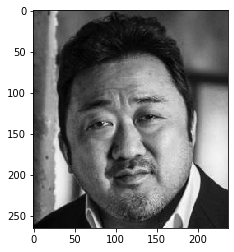

In [0]:
x1=cv2.imread('image1.JPG'); x1= cv2.cvtColor(x1, cv2.COLOR_BGR2GRAY)  ## 흑백으로 변환
plt.imshow(x1,  cmap='gray')
plt.show()

In [0]:
print(x1)
x1.shape


[[81 78 75 ... 64 64 64]
 [83 82 82 ... 64 64 65]
 [78 80 82 ... 65 65 65]
 ...
 [ 6  7  9 ... 27 27 27]
 [ 8  8  7 ... 26 26 25]
 [ 5  6  6 ... 26 25 25]]


(265, 237)

이 사진은 265*237 픽셀을 가지고, 숫자는 각 픽셀의 RGB 코드를 의미한다. 


# ‘customer1500.csv’ 파일을 구글 드라이브에 마운트 한 다음 데이터 파일을 불러오자




In [0]:
dat = np.array(pd.read_csv('customer1500.csv'))
y=dat[:,0]; x=dat[:,1:65] # x= image(8*8), y=고객상태 label


# x는 고객의 특성을 64개의 숫자벡터로 표현한 것이다.
# 특성은 인구통계학적 특성, 구매이력, 또는 사진 등이 될 수 있다

In [0]:
print(x[1])  ## 1번 고객의 특성 벡터

[0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 1]


# y는 각 고객이 어떤 등급에 속하는지 나타내는 레이블이다. 
 
# 	0= buy none
# 	1= buy small
# 	2= buy big

In [0]:
print(y[0:100])


[0 2 0 1 0 2 1 0 2 1 2 2 2 0 2 1 1 1 2 2 2 1 2 2 1 2 2 1 2 2 1 1 2 0 2 1 1
 1 0 2 1 1 1 1 1 2 0 1 2 2 0 2 1 2 1 1 1 0 2 0 0 1 1 1 0 2 1 2 2 2 1 1 2 0
 1 1 1 1 1 0 2 1 1 1 1 1 2 1 2 1 2 1 1 0 1 1 0 2 1 1]


# 고객의 특성을 시각화하여 보자. 
얼굴이미지도 동일하게 처리 가능하다. 어떻게 생긴 고객이 우리 제품 구매가능성이 더 높을까? ㅎㅎ  


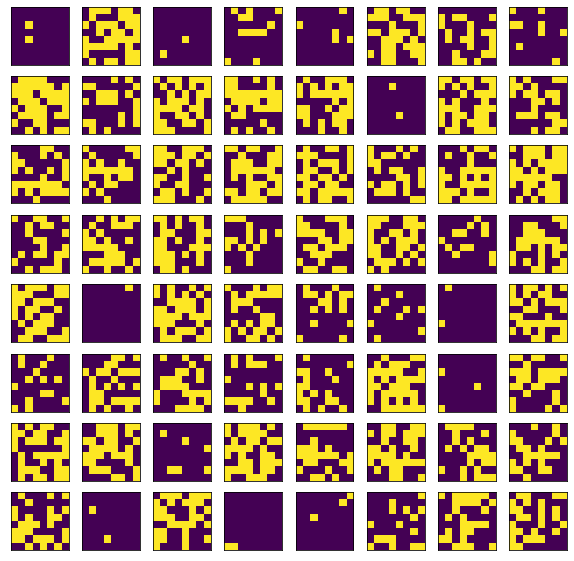

In [0]:
# 이미지 벡터 시각화
z = x.reshape(1499, 8,8)
plt.figure(figsize=(10,10))
for i in range(64) :
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(z[i])
plt.show()

# 딥러닝 파라미터 설정

In [0]:
# 이제 전과 같이 딥러닝 파라미터를 정의하자

hidden_neuron = 0
EPOCH=70; BATCH=32  ## 학습횟수 
class_names = ['buy NONE', 'buy SMALL', 'buy BIG']   
 


# 러닝시작하기

In [0]:
#### 이 아래는 자동으로 실행됨(그대로 둘것)
y = to_categorical(y)

## 학습/검증 데이터 나누기  (80-20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=77)

## 모델만들기
if hidden_neuron ==0: 
    model = Sequential()
    model.add(Dense(y_train.shape[1], input_dim=x_train.shape[1], activation='softmax'))## 은닉층=0
else: 
    model = Sequential()
    model.add(Dense(hidden_neuron, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(y_train.shape[1], activation='softmax')) ## 은닉층=1

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train, y_train, epochs = EPOCH, batch_size=BATCH, validation_data=(x_test, y_test), verbose = 2)
model.summary()






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 1199 samples, validate on 300 samples
Epoch 1/70





 - 1s - loss: 1.1477 - acc: 0.3778 - val_loss: 1.0045 - val_acc: 0.4400
Epoch 2/70
 - 0s - loss: 0.9830 - acc: 0.4229 - val_loss: 0.9504 - val_acc: 0.4267
Epoch 3/70
 - 0s - loss: 0.9427 - acc: 0.4420 - val_loss: 0.9247 - val_acc: 0.4300
Epoch 4/70
 - 0s - loss: 0.9179 - acc: 0.4445 - val_loss: 0.9081 - val_acc: 0.4400
Epoch 5/70
 - 0s - loss: 0.8959 - acc: 0.4529 - val_loss: 0.8923 - val_acc: 0.4400
Epoch 6/70
 - 0s - loss: 0.8783 - acc: 0.4729 - val_loss: 0.8803 - val_acc: 0.4733
Epoch 7/70
 - 0s - loss: 0.8602 - acc: 0.4946 - val_loss: 0.8661 - val_acc: 0.4800
Epoch 8/70
 - 0s - loss: 0.8447 - acc: 0.5104 - val_loss: 0.8574 - val_acc: 0.4833
Epoch 9/70
 - 0s - loss: 0.8297 - acc: 0.5254 - val_loss: 0.8453 - val_acc: 0.4967
Epoch 10/70
 - 0s - loss: 0.8152 - acc: 0.5354 - val_loss: 0.8349 - val_acc: 0.5067
Epoch 11/70
 - 

# 모델성능 시각화하기

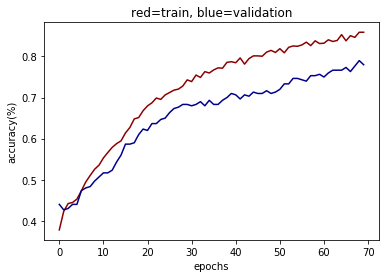

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 195       
Total params: 195
Trainable params: 195
Non-trainable params: 0
_________________________________________________________________


In [0]:
# model fit 그림으로 표시
plt.plot(range(EPOCH), hist.history['acc'], label='Accuracy', color='darkred')
plt.plot(range(EPOCH), hist.history['val_acc'], label='Validation Accuracy', color='darkblue')
plt.xlabel('epochs'); plt.ylabel('accuracy(%)'); plt.title('red=train, blue=validation'); plt.show()
model.summary()

# 신규고객의 이미지를 입력하여, 확률적인 등급예측을 해보자.

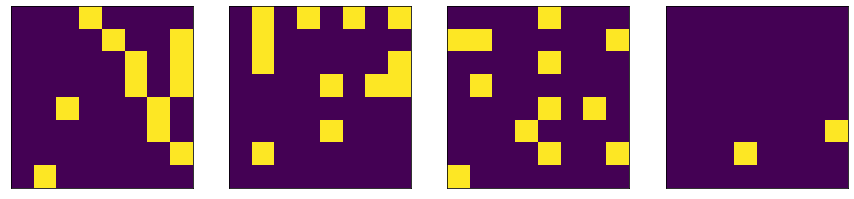

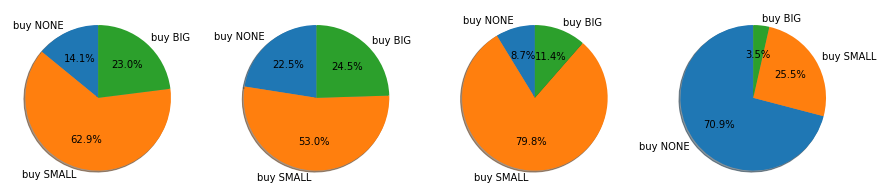

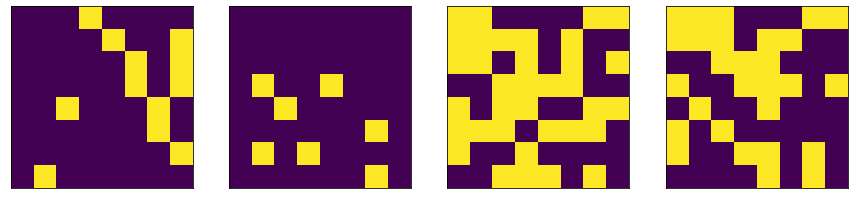

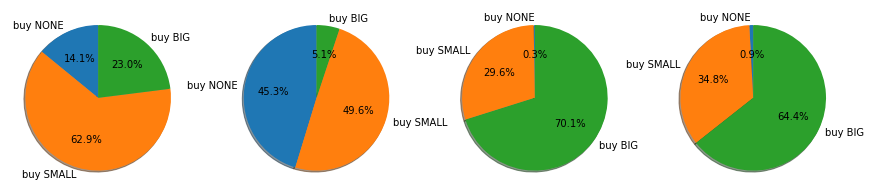

In [0]:
# 예측하기 
x_new= x_test; yhat = model.predict(x_new)
z_new =x_new.reshape(x_new.shape[0], 8,8)

plt.figure(figsize=(15,15))
for i in range(4) :
    plt.subplot(1,4,i+1); plt.xticks([]);plt.yticks([]);plt.grid(False); plt.imshow(z_new[i])
plt.show()
plt.figure(figsize=(15,15))
for i in range(4) :
    plt.subplot(1,4, i+1); plt.xticks([]);plt.yticks([]);plt.grid(False); 
    ratio = yhat[i]; plt.pie(ratio, labels=class_names, shadow=True, startangle=90, autopct='%0.1f%%');   
plt.show()

k=7
plt.figure(figsize=(15,15))
for i in range(4) :
    plt.subplot(1,4,i+1); plt.xticks([]);plt.yticks([]);plt.grid(False); plt.imshow(z_new[k*i])
plt.show()
plt.figure(figsize=(15,15))
for i in range(4) :
    plt.subplot(1,4, i+1); plt.xticks([]);plt.yticks([]);plt.grid(False); 
    ratio = yhat[k*i]; plt.pie(ratio, labels=class_names, shadow=True, startangle=90, autopct='%0.1f%%');   
plt.show()
#EOF

# 어떤 고객이 가장 우수한 것으로 예측되는가? 이 방법을 응용하면 무엇을 할 수 있을지 곰곰이 생각해봅시다. 